In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# K Means

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



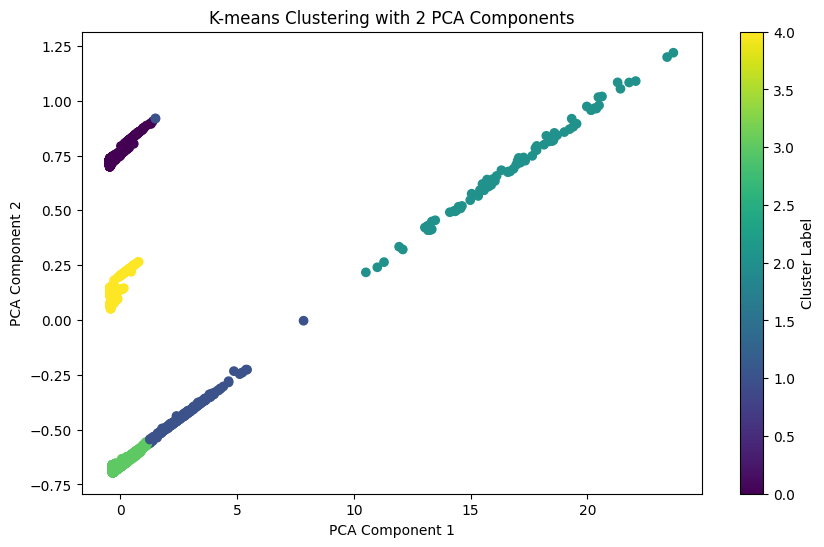

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Load the dataset
path = ('/content/drive/MyDrive/Col_Coffee_Datasets/External/Colombian_Exports_Type_Val.xlsx')
df = pd.read_excel(path)

# Preprocessing: Define categorical and numerical features
categorical_features = ['Country of Destination', 'Type of Coffee']
numerical_features = ['Bags of 70 kg. actual equivalent Exported', 'Bags of 60 Kg. Exported',
                      'Provisional Export Value (USD) *']

# Set up the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(sparse=False), categorical_features)])  # One-hot encode categorical features

# K-means Clustering: Set up the pipeline with preprocessing and clustering
kmeans = Pipeline(steps=[('preprocessor', preprocessor),
                         ('cluster', KMeans(n_clusters=5, random_state=42))])

# Fit the K-means model
kmeans.fit(df)

# Extract cluster labels
cluster_labels = kmeans.named_steps['cluster'].labels_

# PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(preprocessor.transform(df))

# Plotting the clusters using the first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-means Clustering with 2 PCA Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

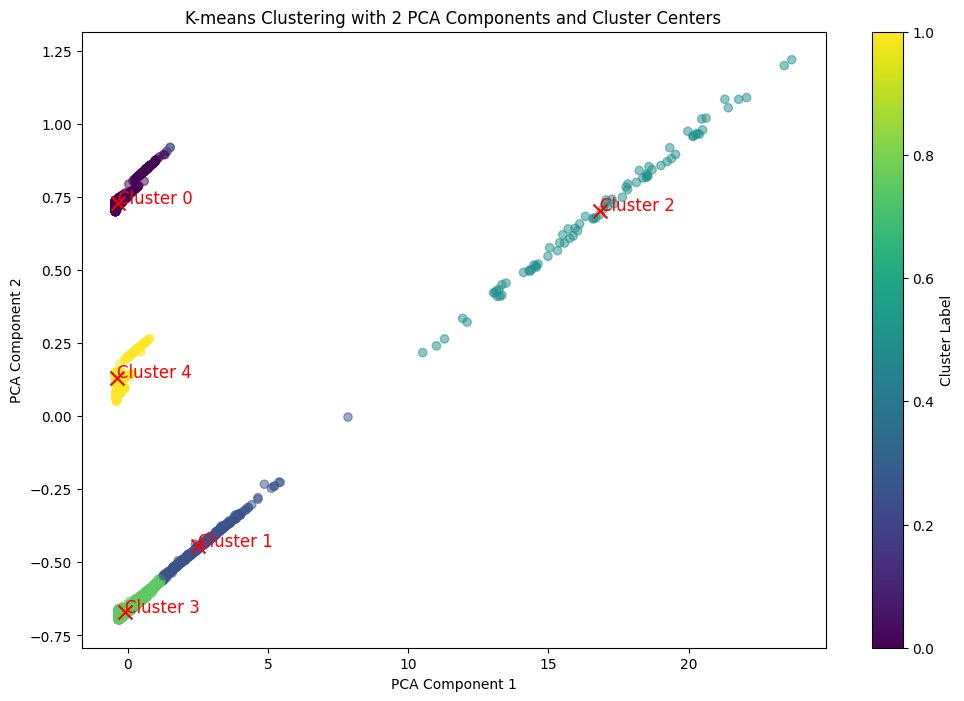

In [44]:
# Calculate and transform cluster centers for visualization
cluster_centers = kmeans.named_steps['cluster'].cluster_centers_
cluster_centers_pca = pca.transform(cluster_centers)

# Plot clusters with annotated cluster centers
plt.figure(figsize=(12, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, alpha=0.5, cmap='viridis')
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', s=100)
for i, txt in enumerate(range(len(cluster_centers_pca))):
    plt.annotate(f"Cluster {txt}", (cluster_centers_pca[i, 0], cluster_centers_pca[i, 1]), fontsize=12, color='red')
plt.title("K-means Clustering with 2 PCA Components and Cluster Centers")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()


In [45]:
# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Grouping the dataset by cluster and extracting the countries
clustered_countries = df.groupby('Cluster')['Country of Destination'].apply(lambda x: x.unique())

# Display the countries in each cluster
print("Countries in each cluster:")
for cluster, countries in clustered_countries.items():
    print(f"Cluster {cluster}: {', '.join(countries)}")

# Finding and displaying the most frequent (dominant) country in each cluster
dominant_countries = df.groupby('Cluster')['Country of Destination'].agg(lambda x: x.value_counts().idxmax())
print("\nDominant Country in Each Cluster:")
print(dominant_countries)

Countries in each cluster:
Cluster 0: Alemania, Australia, Bélgica, Canadá, Chile, China, Colombia, Costa Rica, Dinamarca, Ecuador, EE.UU., Federación Rusa, Finlandia, Francia, Jamaica, Japón, Kuwait, Malasia, México, Países Bajos, Panamá, Perú, Polonia, Puerto Rico, Reino Unido, Suecia, Surinam, Tailandia, Uruguay, Antillas hol., Aruba, Barbados, Corea del Sur, Cuba, E.A.U., España, Honduras, Italia, Nueva Zelanda, Paraguay, Rep.Dominicana, Santa Lucía, Taiwan, TrinidadyTobago, Dominica, El Salvador, Estonia, Granada, Islas Caimán, Nigeria, San Vicente, Singapur, Venezuela, Belice, Guatemala, S.Cris.& Nieves, Antigua/Barbuda, Antillas Neerl, Egipto, India, Bolivia, Brasil, Sudáfrica, Hong Kong, Letonia, Benín, Sint Maarten, Argentina, Nicaragua, Israel, Georgia, Jordania, Guyana, Ucrania, Bulgaria, Eslovaquia, Lituania, Arabia Saudí, Grecia, Vietnam, Is.Vírgenes USA, Turquía, Rumanía, República Congo, Filipinas, Curaçao, Qatar, Croacia, Suiza
Cluster 1: Alemania, Bélgica, Canadá, Japó

In [46]:
# Interactive visualization using Plotly
df_pca_cluster = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_cluster['Cluster'] = cluster_labels
df_pca_cluster['Country of Destination'] = df['Country of Destination']

fig = px.scatter(df_pca_cluster, x='PCA1', y='PCA2', color='Cluster', hover_data=['Country of Destination'])
for i, center in enumerate(cluster_centers_pca):
    fig.add_annotation(x=center[0], y=center[1], text=f"Cluster {i}", showarrow=True, arrowhead=1)
fig.show()